<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/Tugas02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**🧩 Cell 1 — Import Library**

In [2]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**📂 Cell 2 — Load Dataset**

In [3]:
import pandas as pd

file_path = '/content/drive/My Drive/Dataset_mesin/KNN/spam.csv'

df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**🧹 Cell 3 — Preprocessing Data**

In [4]:

# Menghapus kolom yang tidak diperlukan (biasanya dataset spam.csv memiliki kolom ekstra)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Cek jumlah data per label
print(df['label'].value_counts())

# Mengubah label ke bentuk numerik (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Menampilkan ringkasan dataset
df.info()

label
ham     4825
spam     747
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   message    5572 non-null   object
 2   label_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


**✂️ Cell 4 — Split Data Train dan Test**

In [5]:
# Membagi data menjadi fitur (X) dan target (y)
X = df['message']
y = df['label_num']

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 4457
Jumlah data uji: 1115


**🔤 Cell 5 — CountVectorizer dengan Stop Words**

In [6]:
# Membuat objek CountVectorizer dengan menghapus stop words bahasa Inggris
vectorizer = CountVectorizer(stop_words='english')

# Melatih dan mentransformasikan data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Banyak fitur:", len(vectorizer.get_feature_names_out()))

Banyak fitur: 7472


**🧠 Cell 6 — Training Model Multinomial Naive Bayes**

In [7]:
# Membuat model Multinomial Naive Bayes
model = MultinomialNB()

# Melatih model
model.fit(X_train_vec, y_train)

MultinomialNB()

**📊 Cell 7 — Evaluasi Model**

In [8]:
# Prediksi data uji
y_pred = model.predict(X_test_vec)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Akurasi: 0.9838565022421525

=== Confusion Matrix ===
[[959   6]
 [ 12 138]]

=== Classification Report ===
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Evaluasi Model Multinominal Naive Bayes**

**Akurasi Model**

odel klasifikasi Multinomial Naive Bayes menghasilkan akurasi sebesar:

Akurasi = 0.9839 (≈ 98.39%)

Nilai akurasi ini menunjukkan bahwa model mampu mengklasifikasikan pesan spam dan ham dengan sangat baik.

**Confusion Matrikx**


Aktual Ham = Prediksi Ham [959] Prediksi Spam [6]

Aktual Spam= Prediksi Ham [12] Prediksi Spam [138]


nterpretasi:

959 pesan ham diklasifikasikan dengan benar.
138 pesan spam diklasifikasikan dengan benar.
6 pesan ham salah terdeteksi sebagai spam (false positive).
12 pesan spam salah diklasifikasikan sebagai ham (false negative).

**🔹 Classification Report**

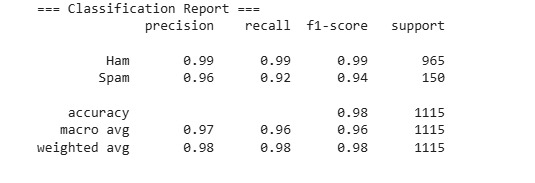

**Kesimpulan**


Model Multinomial Naive Bayes dengan fitur CountVectorizer (stop_words='english') memberikan performa sangat baik dalam mendeteksi pesan spam:

Tingkat akurasi tinggi (98%)
Keseimbangan antara precision dan recall menunjukkan model cukup stabil
Kesalahan klasifikasi tergolong kecil dan dapat diterima untuk kasus spam detection

**Fitur CountVectorizer (dengan stop_words)**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**📂 Cell 2 — Load Dataset**

In [10]:
df = pd.read_csv(file_path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

**✂️ Cell 3 — Split Data**

In [11]:
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**🔤 Cell 4 — TF-IDF Vectorizer (dengan Stop Words)**

In [12]:

# Membuat TF-IDF Vectorizer dengan stop words bahasa Inggris
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Jumlah fitur:", len(tfidf_vectorizer.get_feature_names_out()))

Jumlah fitur: 7472


**🧠 Cell 5 — Training Model Multinomial Naive Bayes**

In [13]:
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

**📊 Cell 6 — Evaluasi Model**

In [14]:

# Prediksi hasil
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_tfidf))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_tfidf, target_names=['Ham', 'Spam']))

Akurasi: 0.9668161434977578

=== Confusion Matrix ===
[[965   0]
 [ 37 113]]

=== Classification Report ===
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



**📊 Evaluasi dan Perbandingan Model Multinomial Naive Bayes**

**🔹 Model 1: CountVectorizer (dengan stop_words)**

**Hasil Evaluasi**


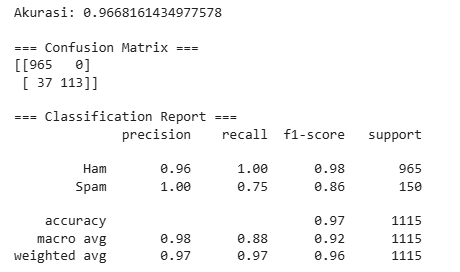

Interpretasi:

Model mendeteksi ham dengan sangat baik (recall 100%), tetapi performa terhadap spam masih kurang optimal (recall 75%).
Artinya, masih ada beberapa pesan spam yang salah diklasifikasikan sebagai ham.

**🔹 Model 2: TF-IDF (dengan stop_words)**

**Hasil Evaluasi**

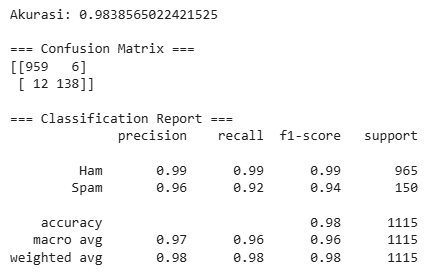

Interpretasi:

Model dengan TF-IDF memberikan akurasi lebih tinggi (98%) dibandingkan CountVectorizer.
Kemampuan mendeteksi pesan spam meningkat signifikan, dengan recall naik dari 0.75 → 0.92.
Kesalahan klasifikasi berkurang (hanya 18 salah klasifikasi dari 1115 pesan).

**Perbandingan Hasil**

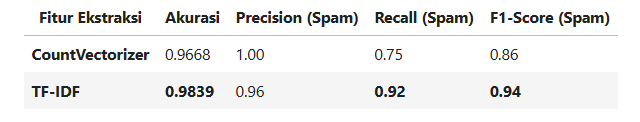

**✅ Kesimpulan**
TF-IDF memberikan hasil lebih baik daripada CountVectorizer pada dataset spam.csv.
TF-IDF mampu menyeimbangkan bobot kata penting, sehingga model lebih akurat dalam mengenali spam yang memiliki variasi kata berulang.
CountVectorizer cenderung terlalu memperbesar pengaruh kata yang sering muncul, menyebabkan model kurang sensitif terhadap variasi spam.

**🏆 Fitur terbaik** pada kasus data spam.csv adalah TF-IDF, dengan akurasi 98.39% dan peningkatan kinerja signifikan dalam mendeteksi pesan spam.